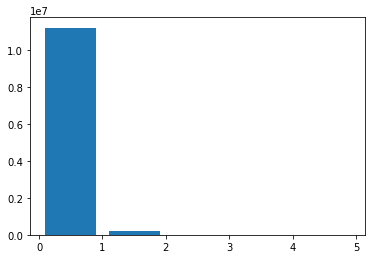

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DIR = '/Users/adarsh_23/CNS/Envisioning-Kaggle-main/Metadata'
users_df = pd.read_csv(DIR+'/Users.csv', infer_datetime_format=True)

hist_of_tier_all = plt.hist(users_df['PerformanceTier'], bins=[0, 1, 2, 3, 4, 5], rwidth=0.8)


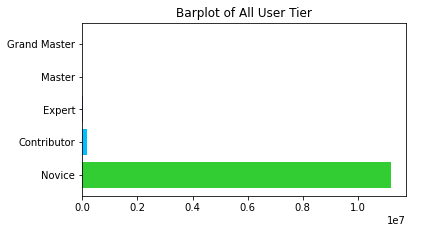

In [9]:
counts_all, bins, bars = hist_of_tier_all
#counts_all
tiers = ['Novice', 'Contributor', 'Expert', 'Master', 'Grand Master']
#tiers
tier_counts_all_df = pd.DataFrame(data={'Tier': tiers, 'NumOfUsers': counts_all})
#tier_counts_all_df
fig_all = plt.figure(figsize=(6,3))
axes_all= fig_all.add_axes((0.2, 0.1, 0.75, 0.8))
axes_all.barh(tier_counts_all_df.Tier, tier_counts_all_df.NumOfUsers, color=['limegreen', 'deepskyblue', 'mediumpurple', 'tomato', 'gold'])

for i, v in enumerate(tier_counts_all_df.NumOfUsers):
    plt.text(v + 0, i + .1, str(int(v)), color='white', fontsize='small')
    
plt.title("Barplot of All User Tier")
plt.savefig('All user tier barplot.png')
plt.show()

11749261.65

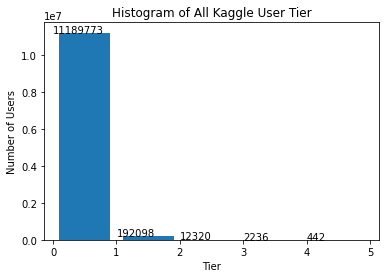

In [10]:
tier_bins=5
hist_of_tier_all = plt.hist(users_df['PerformanceTier'], bins=[0, 1, 2, 3, 4, 5], rwidth=0.8)
plt.title("Histogram of All Kaggle User Tier")
plt.xlabel("Tier")
plt.ylabel("Number of Users")
for i in range(tier_bins):
    plt.text(hist_of_tier_all[1][i],hist_of_tier_all[0][i],int((hist_of_tier_all[0][i])))
    
bottom, top = plt.ylim()
top

In [11]:
# Now for HPA

#read in dfs and declare variables to select competition of interest

comps_df = pd.read_csv(DIR+'/Competitions.csv', parse_dates=['DeadlineDate'])

#comp_title = "Human Protein Atlas - Single Cell Classification"
comp_title = "HuBMAP + HPA - Hacking the Human Body"
comp_overview = comps_df[comps_df.Title==comp_title]
comp_id = comp_overview.iloc[0]['Id']

comp_id

34547

In [12]:
teams_df = pd.read_csv(DIR+'/Teams.csv', infer_datetime_format=True)

comp_teams_df = teams_df[teams_df.CompetitionId==comp_id].dropna(subset=['LastSubmissionDate'])

team_ids_list = comp_teams_df.Id.unique().tolist()
len(team_ids_list)

/var/folders/hc/1stky0sd2_z9nqk66bk22rs80000gn/T/ipykernel_54050/1484400735.py:1: DtypeWarning: Columns (5,10) have mixed types. Specify dtype option on import or set low_memory=False.
  teams_df = pd.read_csv(DIR+'/Teams.csv', infer_datetime_format=True)


1175

In [13]:
team_memberships_df = pd.read_csv(DIR+'/TeamMemberships.csv', infer_datetime_format=True)
team_memberships_df.shape

(5908972, 4)

In [14]:
comp_team_memberships_df = team_memberships_df[team_memberships_df.TeamId.isin(team_ids_list)]
comp_team_memberships_df.head(5)

,Id,TeamId,UserId,RequestDate
5813492,9069105,8805826,2132795,06/22/2022
5813497,9069126,8805846,1107630,06/22/2022
5813499,9069134,8805854,6537187,06/22/2022
5813505,9069170,8805890,10654180,06/22/2022
5813506,9069174,8805894,4212496,06/22/2022


In [15]:
comp_users_list = list(comp_team_memberships_df.UserId.unique())
#comp_users_list
comp_users_df = users_df[users_df.Id.isin(comp_users_list)]

In [16]:

len(comp_users_list)

1516

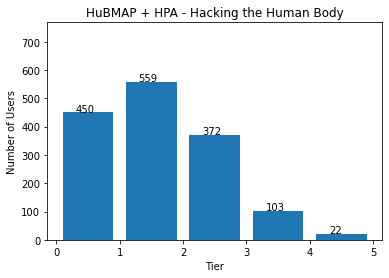

In [25]:
tier_bins=5
hist_of_tier_hpa = plt.hist(comp_users_df['PerformanceTier'], bins=[0, 1, 2, 3, 4, 5], rwidth=0.8)
#plt.title("Histogram of HPA - Single Cell Classification User Tier")
plt.title("HuBMAP + HPA - Hacking the Human Body")
plt.xlabel("Tier")
plt.ylabel("Number of Users")
for i in range(tier_bins):
    plt.text(hist_of_tier_hpa[1][i]+.3
             ,hist_of_tier_hpa[0][i]+1,int(hist_of_tier_hpa[0][i]))
    
plt.ylim(top=768.6)
plt.savefig('HPA user another.png')
plt.show()

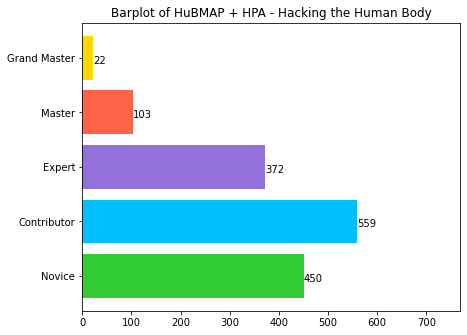

In [34]:
counts_hpa, bins, bars = hist_of_tier_hpa
#counts_all
tiers = ['Novice', 'Contributor', 'Expert', 'Master', 'Grand Master']
#tiers
tier_counts_hpa_df = pd.DataFrame(data={'Tier': tiers, 'NumOfUsers': counts_hpa})
#tier_counts_hpa_df
fig_hpa = plt.figure(figsize=(7,5))
axes_hpa= fig_hpa.add_axes((0.2, 0.1, 0.75, 0.8))
axes_hpa.barh(tier_counts_hpa_df.Tier, tier_counts_hpa_df.NumOfUsers, color=['limegreen', 'deepskyblue', 'mediumpurple', 'tomato', 'gold'])

for i, v in enumerate(tier_counts_hpa_df.NumOfUsers):
    plt.text(v + 1, i - .1, str(int(v)), color='black', fontsize='medium')
    
plt.xlim(right=768.6)
#plt.title("Barplot of HPA - Single Cell Classification User Tier")
plt.title("Barplot of HuBMAP + HPA - Hacking the Human Body")
plt.savefig('HPA user tier barplot.png')
plt.savefig('HPA user tier barplot.svg')
plt.show()